In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

In [23]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [27]:
%watermark -ajinhyo -u -d -v -pnumpy,pandas,matplotlib,seaborn,missingno,sklearn

jinhyo 
last updated: 2019-09-04 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
pandas 0.24.2
matplotlib 3.0.3
seaborn 0.9.0
missingno 0.4.2
sklearn 0.20.3


---

# 1. 데이터 불러오기

In [27]:
# 붙임1 지자기교란 예측모델 개발용 데이터셋_수정190820/태양풍

ace = pd.DataFrame()
for name in os.listdir('proc_data/ace'):
    ins_data = pd.read_csv(f'proc_data/ace/{name}', parse_dates=['dt'])
    ace = pd.concat([ace, ins_data], axis=0)

ace.sample(5)

,dt,Np,Tp,Vp,B_gsm_x,B_gsm_y,B_gsm_z,Bmag
475059,2008-12-17 21:30:00,-9999.900,-9999.9,313.42,1.150,3.872,0.425,4.073
192011,2011-05-23 05:31:00,-9999.900,111190.0,449.31,-1.941,2.932,2.447,4.312
95732,2004-03-11 21:54:00,4.035,354450.0,659.36,2.273,-6.299,-1.331,7.295
490526,2001-12-30 08:25:00,14.631,20700.0,398.38,6.750,-13.002,13.066,19.632
287432,2005-08-01 21:53:00,-9999.900,-9999.9,-9999.90,5.473,-3.739,-0.891,6.738


In [28]:
# 붙임1 지자기교란 예측모델 개발용 데이터셋_수정190820/지자기교란 지수

target = pd.read_csv("proc_data/target.csv", parse_dates=['dt'])
target.head()

,dt,value
0,1999-01-01 00:00:00,0
1,1999-01-01 03:00:00,2
2,1999-01-01 06:00:00,1
3,1999-01-01 09:00:00,2
4,1999-01-01 12:00:00,2


In [29]:
# 붙임2 AI 경진대회 문제(태양풍 데이터)

problem = pd.read_csv("proc_data/problem.csv", parse_dates=['dt'])
problem.head()

,dt,Np,Tp,Vp,B_gsm_x,B_gsm_y,B_gsm_z,Bmag
0,2015-01-01 00:00:00,1.852,41618.0,455.61,6.098,2.449,-13.415,14.952
1,2015-01-01 00:01:00,2.181,33781.0,461.07,6.700,1.502,-13.232,14.912
2,2015-01-01 00:02:00,2.415,34709.0,464.84,7.390,0.523,-12.941,14.928
3,2015-01-01 00:03:00,2.359,34183.0,470.76,8.011,-0.098,-12.694,15.013
4,2015-01-01 00:04:00,1.237,32467.0,469.51,7.493,0.410,-13.058,15.064


In [30]:
# 붙임5 추가 태양풍 데이터(과제문제의 전년도 6개월)

additional = pd.read_csv("proc_data/additional.csv", parse_dates=['dt'])
additional.head()

,dt,Np,Tp,Vp,B_gsm_x,B_gsm_y,B_gsm_z,Bmag
0,2014-06-29 00:01:00,2.416,65701.0,402.18,-4.212,-3.982,2.445,6.298
1,2014-06-29 00:02:00,2.493,68240.0,399.89,-4.566,-3.473,2.766,6.430
2,2014-06-29 00:03:00,2.582,85224.0,389.17,-5.456,-2.370,2.837,6.596
3,2014-06-29 00:04:00,2.686,90925.0,390.59,-5.550,-1.988,2.768,6.519
4,2014-06-29 00:05:00,2.676,79821.0,392.44,-4.922,-3.073,2.679,6.416


---

# 1.5 기초통계분석

---

# 2.데이터 전처리

In [188]:
from copy import deepcopy
ace_origin = deepcopy(ace)
target_origin = target.copy()

---

# 3.시각화

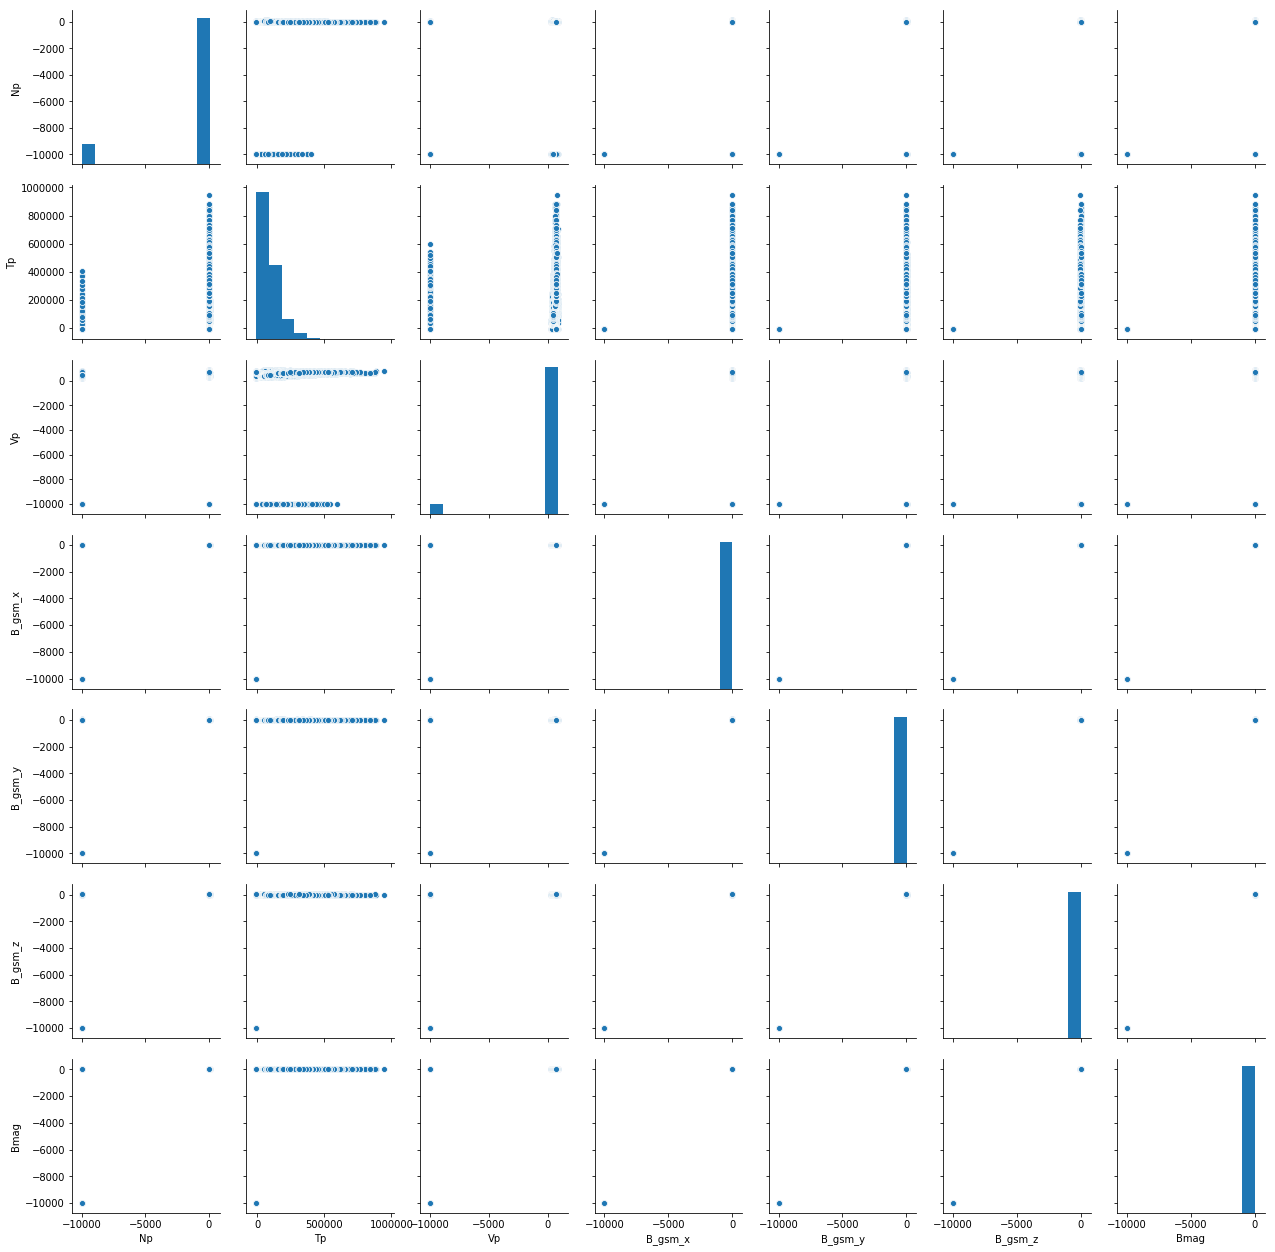

In [160]:
sns.pairplot(ace[1999])

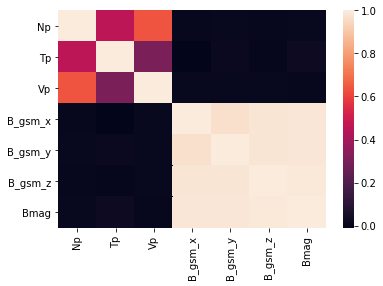

In [161]:
sns.heatmap(ace[1999].corr())

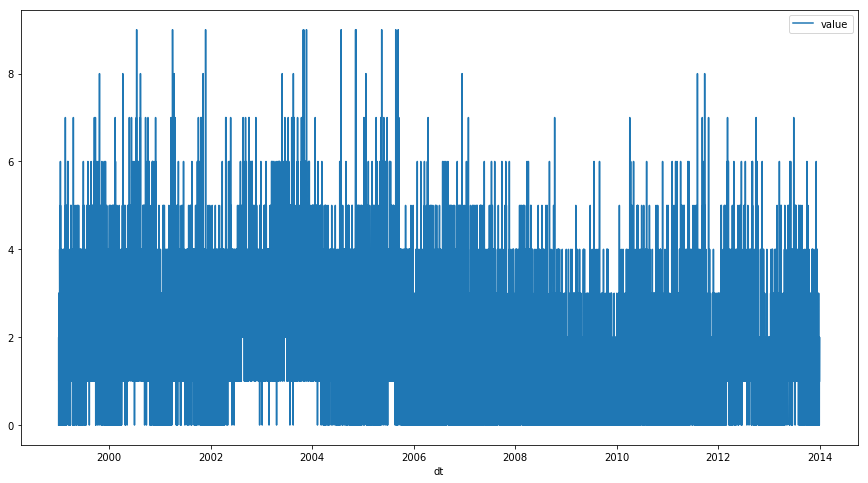

In [275]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=target)

# train test split

In [166]:
ace_train = pd.DataFrame(columns=ace[1999].columns)

for year in range(1999, 2012):
    ace_train = pd.concat([ace_train, ace[year]], axis=0)

In [179]:
ace_train = pd.concat([
    ace_train, 
    ace[2012].loc[:pd.Timestamp(year=2012, month=6, day=30, hour=23, minute=59), :]
], axis=0)

In [183]:
ace_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6688353 entries, 1999-01-01 00:00:00 to 2012-06-30 23:59:00
Data columns (total 7 columns):
Np         float64
Tp         float64
Vp         float64
B_gsm_x    float64
B_gsm_y    float64
B_gsm_z    float64
Bmag       float64
dtypes: float64(7)
memory usage: 408.2 MB


In [184]:
ace_test = pd.DataFrame(columns=ace_total.columns)

ace_test = pd.concat([
    ace_test,
    ace[2012].loc[pd.Timestamp(year=2012, month=7, day=1, hour=0, minute=0):, :],
    ace[2013]
], axis=0)

In [185]:
ace_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741151 entries, 2012-07-01 00:00:00 to 2013-12-31 23:59:00
Data columns (total 7 columns):
Np         741151 non-null float64
Tp         741151 non-null float64
Vp         741151 non-null float64
B_gsm_x    741151 non-null float64
B_gsm_y    741151 non-null float64
B_gsm_z    741151 non-null float64
Bmag       741151 non-null float64
dtypes: float64(7)
memory usage: 45.2 MB


In [279]:
ace_train_y = target.loc[:pd.Timestamp(year=2012, month=6, day=30, hour=21)]

In [284]:
ace_test_y = target.iloc[len(ace_train_y):]

# 